In [65]:
#Import necessary libraries

#for data analysis
import pandas as pd
import numpy as np

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler #normalise your data between 0 and 1

#classifier libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")


In [66]:
#load the dataset

df = pd.read_csv("C:\\Users\\User2\\Downloads\\heart - heart.csv")
df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [67]:
#rename the column for better understanding
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [69]:
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


age                        False
sex                        False
chest_pain_type            False
resting_blood_pressure     False
cholesterol                False
fasting_blood_sugar        False
rest_ecg                   False
max_heart_rate_achieved    False
exercise_induced_angina    False
st_depression              False
st_slope                   False
num_major_vessels          False
thalassemia                False
target                     False
dtype: bool


<Axes: >

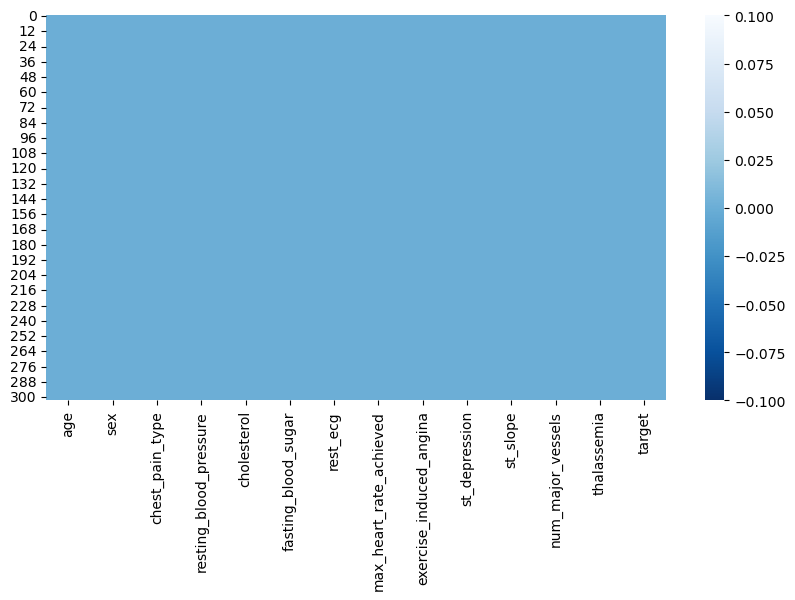

In [70]:
print(df.isnull().any())
#visualise missing data

plt.figure(figsize = (10,5))
sns.heatmap(df.isnull(), cbar=True,  cmap="Blues_r")

### Exploratory Data Analysis

#### Univariate Analysis

In [71]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

<Axes: xlabel='thalassemia'>

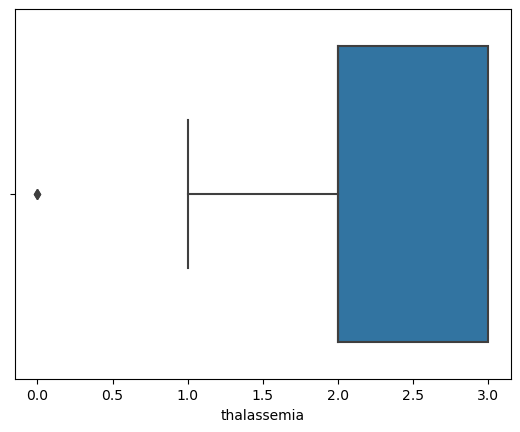

In [72]:
# check for outliers

sns.boxplot(x=df['thalassemia'])

<Axes: xlabel='cholesterol'>

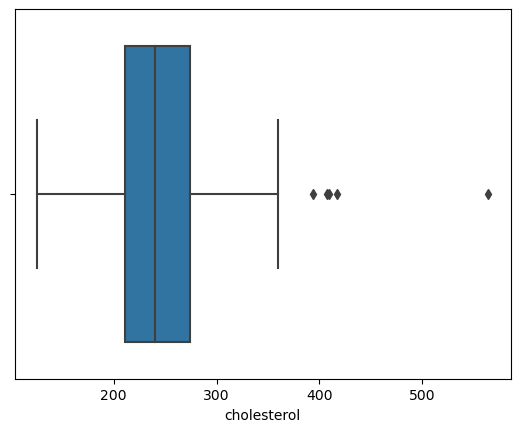

In [73]:
sns.boxplot(x=df['cholesterol'])

<Axes: xlabel='resting_blood_pressure'>

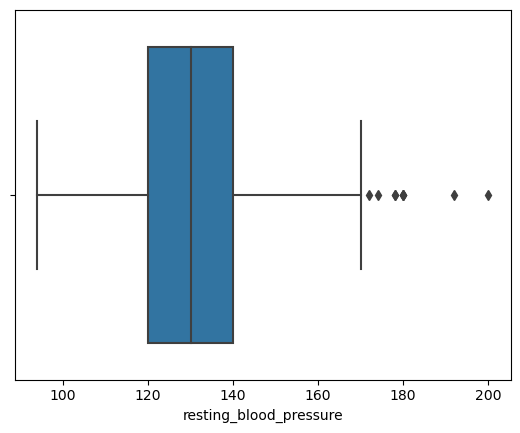

In [74]:
sns.boxplot(x=df['resting_blood_pressure'])

<Axes: xlabel='max_heart_rate_achieved'>

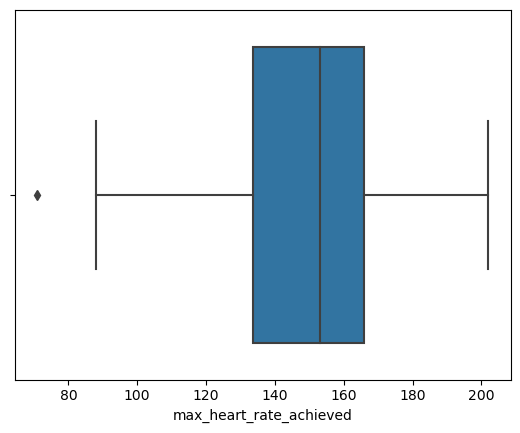

In [75]:
sns.boxplot(x=df['max_heart_rate_achieved'])

Text(0.5, 1.0, 'Total number of Patients')

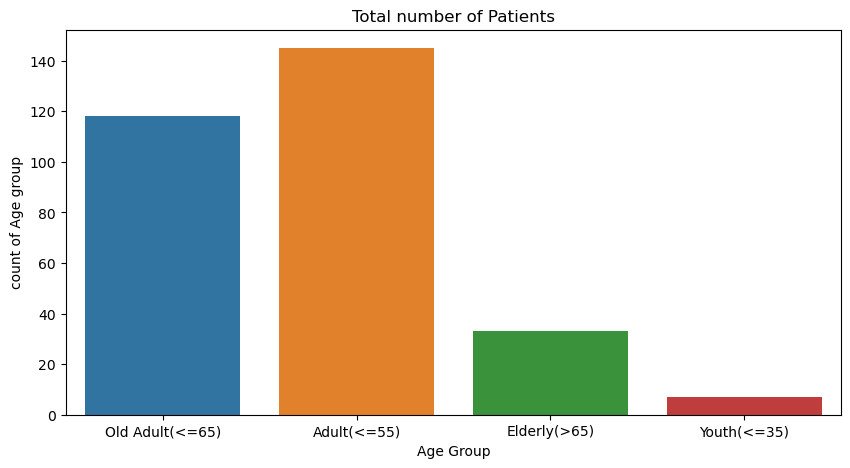

In [76]:
#Data visualization
#age bracket

def age_bracket(age):
    if age <= 35:
        return "Youth(<=35)"
    elif age <= 55:
        return "Adult(<=55)"
    elif age <= 65:
        return "Old Adult(<=65)"
    else:
        return "Elderly(>65)"
    
df['age_bracket'] = df['age'].apply(age_bracket)

#investigating the age of group of patients

plt.figure(figsize = (10, 5))
sns.countplot(x='age_bracket', data=df)
plt.xlabel('Age Group')
plt.ylabel('count of Age group')
plt.title('Total number of Patients')

Text(0.5, 1.0, 'Total number of patients')

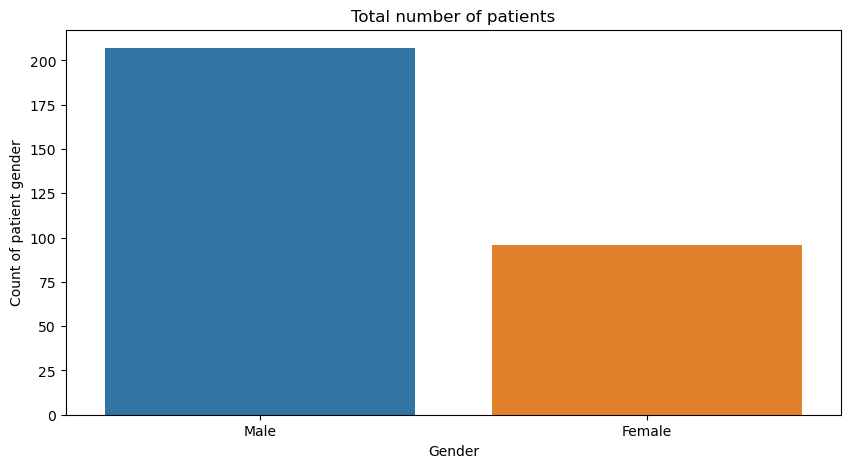

In [77]:
#data visualization for gender

def gender(sex):
    if sex == 1:
        return "Male"
    else:
        return "Female"
    
df['gender'] = df['sex'].apply(gender)

#investigation the gender of patients
plt.figure(figsize = (10,5))
sns.countplot(x='gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Count of patient gender')
plt.title('Total number of patients')

Text(0.5, 1.0, 'Total number of patients')

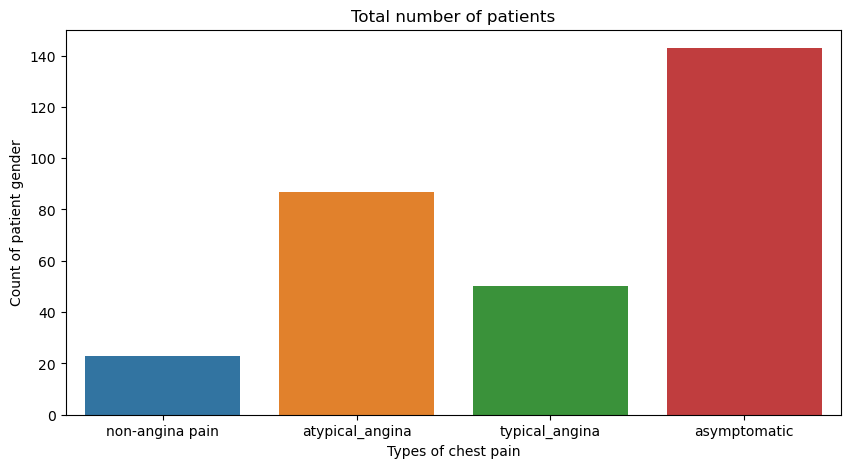

In [78]:
#data vsualization for chest pain type
#chest pain type(1: typical angina, 2: atypical angina, 3: non angina pain, 4: asymptomatic)

def chest_pain(cp):
    if cp == 1:
        return "typical_angina"
    elif cp == 2:
        return "atypical_angina"
    elif cp == 3:
        return "non-angina pain"
    else:
        return "asymptomatic"
    
df['cp_cat'] = df['chest_pain_type'].apply(chest_pain)

#investigation the gender of patients
plt.figure(figsize = (10,5))
sns.countplot(x='cp_cat', data=df)
plt.xlabel('Types of chest pain')
plt.ylabel('Count of patient gender')
plt.title('Total number of patients')

yes    165
no     138
Name: label, dtype: int64


Text(0.5, 1.0, 'Total number of patients')

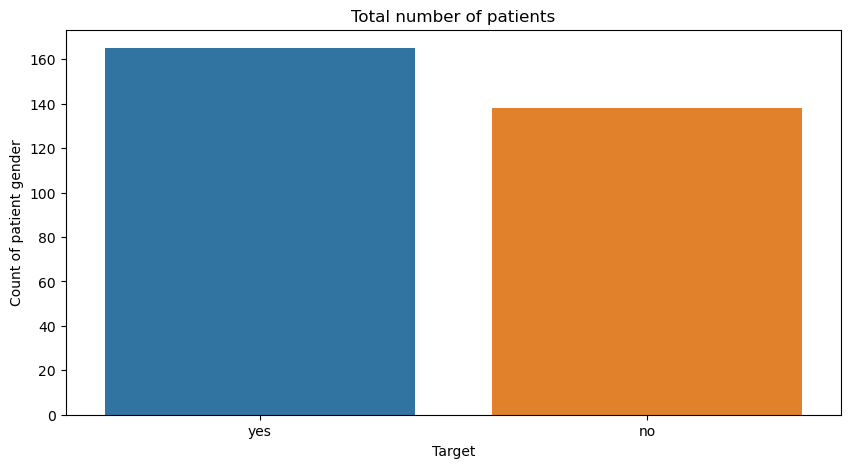

In [79]:
#data vsualization for target
#target - have disease or not (1=yes, 0=no)

def label(tg):
    if tg == 1:
        return "yes"
    else:
        return "no"
    
df['label'] = df['target'].apply(label)

print(df["label"].value_counts())
#investigation the gender of patients
plt.figure(figsize = (10,5))
sns.countplot(x='label', data=df)
plt.xlabel('Target')
plt.ylabel('Count of patient gender')
plt.title('Total number of patients')

### Bivariate Analysis

Text(0.5, 1.0, 'Total Number of patients')

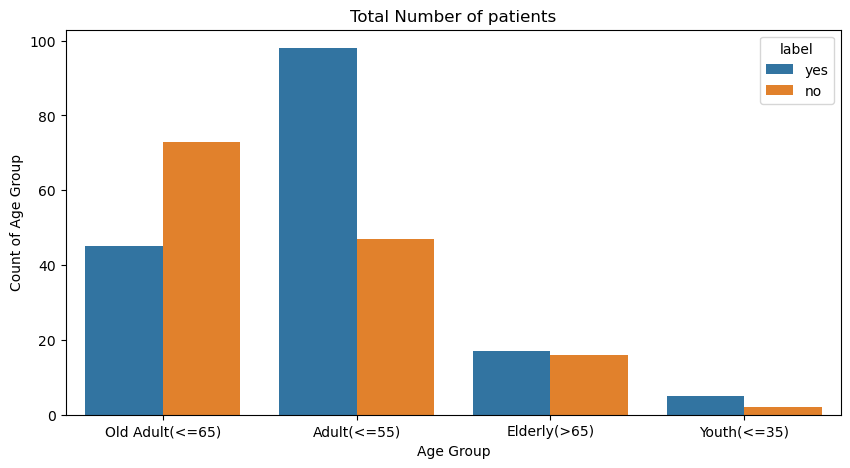

In [80]:
#investigating the age group of patiets by the traget feature

plt.figure(figsize= (10, 5))
sns.countplot(x='age_bracket', data=df, hue='label')
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of patients')

Text(0.5, 1.0, 'Total Number of patients')

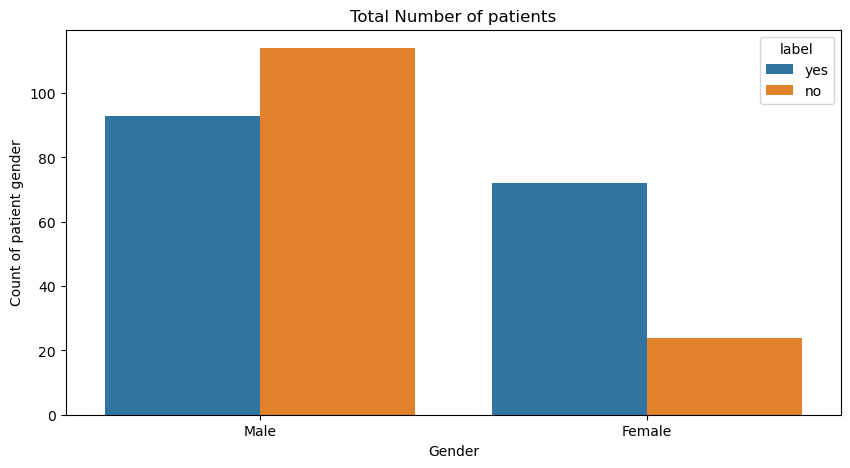

In [81]:
#investigating the gender of patients by the target feature

plt.figure(figsize= (10, 5))
sns.countplot(x='gender', data=df, hue='label')
plt.xlabel('Gender')
plt.ylabel('Count of patient gender')
plt.title('Total Number of patients')

Text(0.5, 1.0, 'Total Number of patients')

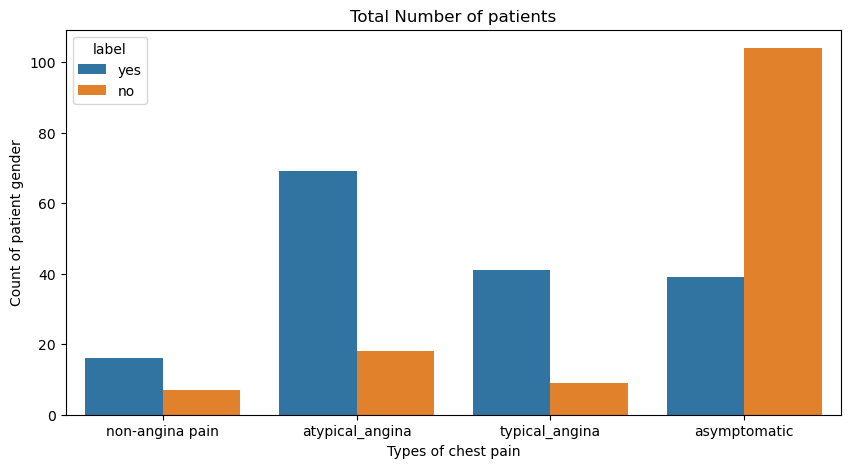

In [82]:
#investigating the chest pain type by the target feature

plt.figure(figsize= (10, 5))
sns.countplot(x='cp_cat', data=df, hue='label')
plt.xlabel('Types of chest pain')
plt.ylabel('Count of patient gender')
plt.title('Total Number of patients')

### multivariate analysis

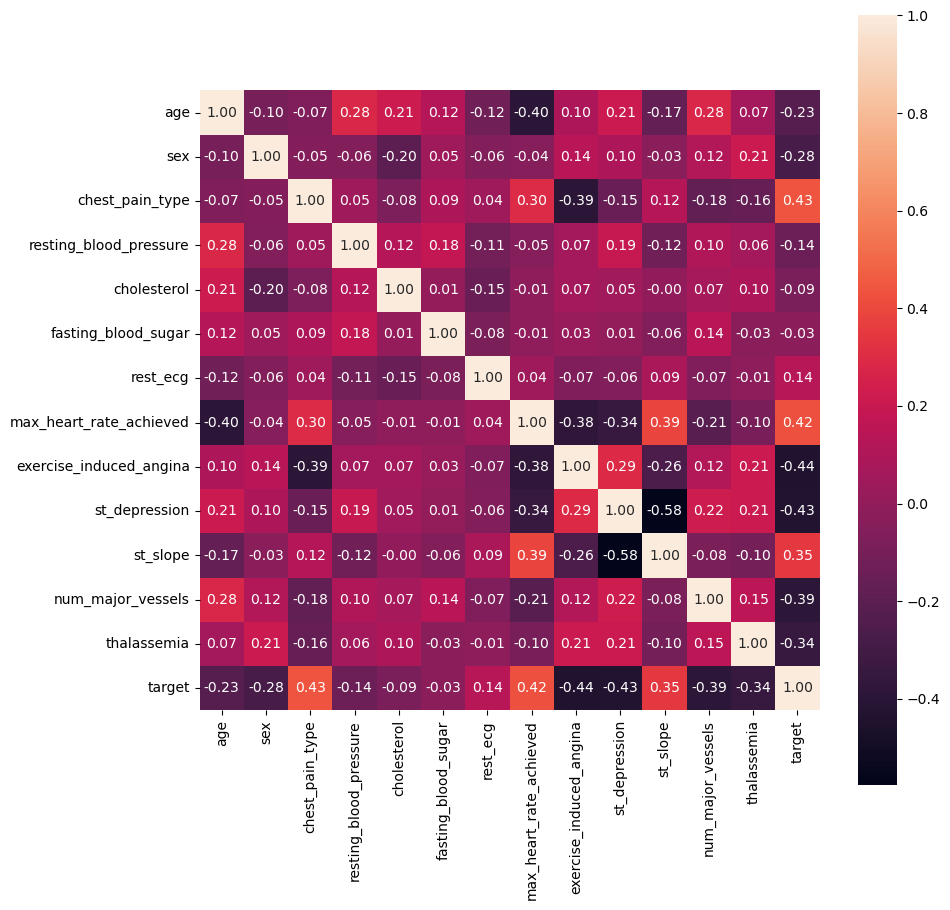

In [83]:
plt.figure(figsize= (10, 10))

hm = sns.heatmap(df.corr(), cbar=True, annot=True, square=True, fmt='.2f',
                 annot_kws = {'size': 10})

### Feature Engineering/ Data Preprocesing

In [84]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender,cp_cat,label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male,non-angina pain,yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male,atypical_angina,yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female,typical_angina,yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),Male,typical_angina,yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),Female,asymptomatic,yes


In [85]:
#create a copy of the data (exclude target / label alongside columns that was created)

df1 = df[['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia']]
          
label = df[['target']]

In [86]:
df1.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [87]:
label.head()

,target
0,1
1,1
2,1
3,1
4,1


In [88]:
df1.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
dtype: object

In [89]:
# dealing with outliers - resting_blood_pressure, cholesterol, thalassemia

#normalize the data

scaler = MinMaxScaler()

df1["Scaled_RBP"] = scaler.fit_transform(df1['resting_blood_pressure'].values.reshape(-1, 1))
df1["Scaled_chol"] = scaler.fit_transform(df1[['cholesterol']].values.reshape(-1, 1))
df1["Scaled_thal"] = scaler.fit_transform(df1[['thalassemia']].values.reshape(-1, 1))
df1["Scaled_max_heart_rate"] = scaler.fit_transform(df1[['max_heart_rate_achieved']].values.reshape(-1, 1))

df1.drop(['resting_blood_pressure', 'thalassemia', 'cholesterol', 'max_heart_rate_achieved'], axis=1, inplace=True)

df1.head()

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
0,63,1,3,1,0,0,2.3,0,0,0.481132,0.244292,0.333333,0.603053
1,37,1,2,0,1,0,3.5,0,0,0.339623,0.283105,0.666667,0.885496
2,41,0,1,0,0,0,1.4,2,0,0.339623,0.178082,0.666667,0.770992
3,56,1,1,0,1,0,0.8,2,0,0.245283,0.251142,0.666667,0.816794
4,57,0,0,0,1,1,0.6,2,0,0.245283,0.520548,0.666667,0.702290


### Machine Learning

In [90]:
#split the dataset into training and testing sets
X_train, x_test, y_train, y_test = train_test_split(df1, label, test_size=0.2, random_state=42)

In [91]:
#Model building

#Logsitic Regression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

ly_pred = logreg.predict(x_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

Logistic Regression
Accuracy: 0.8360655737704918
Precision: 0.8666666666666667
Recall: 0.8125
F1-score: 0.8387096774193549
AUC-ROC: 0.8372844827586207


<function matplotlib.pyplot.show(close=None, block=None)>

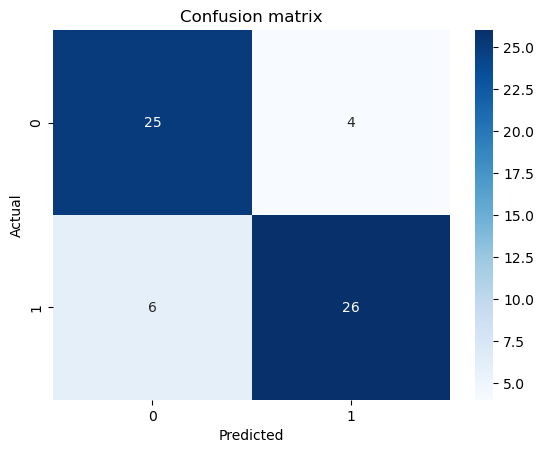

In [92]:
#create a confusion matrix

lcm = confusion_matrix(y_test, ly_pred)

#visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show

In [93]:
#Model building
#Randon forest classifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfy_pred = rfc.predict(x_test)

print("Random Forest")
print("Accuracy:", accuracy_score(y_test, rfy_pred))
print("Precision:", precision_score(y_test, rfy_pred))
print("Recall:", recall_score(y_test, rfy_pred))
print("F1-score:", f1_score(y_test, rfy_pred))
print("AUC-ROC:", roc_auc_score(y_test, rfy_pred))

Random Forest
Accuracy: 0.8360655737704918
Precision: 0.84375
Recall: 0.84375
F1-score: 0.84375
AUC-ROC: 0.8356681034482758


<function matplotlib.pyplot.show(close=None, block=None)>

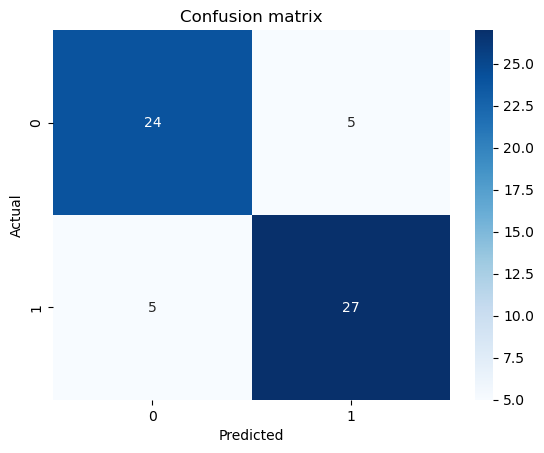

In [94]:
#create a confusion matrix

rcm = confusion_matrix(y_test, rfy_pred)

#visualize the confusion matrix
sns.heatmap(rcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show

In [96]:
#8 machine learning algorithm

classifiers = [[XGBClassifier(), 'XGB Classifier'],
                     [RandomForestClassifier(), 'Random Forest'],
                     [KNeighborsClassifier(), 'K-Nearest Neighbours'],
                     [SGDClassifier(), 'SGD Classifier'],
                     [SVC(), 'SVC'],
                     [GaussianNB(), 'Naive Bayes'],
                     [DecisionTreeClassifier(random_state =42), "Decision tree"],
                     [LogisticRegression(), 'Logistic Regression']
                    ]

In [97]:
classifiers

[[XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                predictor=None, random_state=None, ...),
  'XGB Classifier'],
 [RandomForestClassifier(), 'Random Forest'],
 [KNeighborsClassifier(), 'K-Nearest Neighbours'],
 [SGDClassifier(), 'SGD Classifier'],
 [SVC(), 'SVC'],
 [GaussianNB(), 'Naive Bayes'],
 [DecisionTreeClassi

In [98]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(x_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100, 2)) + '%'])
    
    if model_name != classifiers[-1][1]:
        print(' ')

In [102]:
print("Accuracy Score")
sl = pd.DataFrame(acc_list)
sl.head()

Accuracy Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,83.61%,85.25%,75.41%,47.54%,65.57%,86.89%,85.25%,83.61%


In [103]:
print("Precision")
sl1 = pd.DataFrame(precision_list)
sl1.head()

Precision


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,86.67%,84.85%,79.31%,0.0%,65.71%,90.0%,92.59%,86.67%


In [104]:
print("Recall")
sl2 = pd.DataFrame(recall_list)
sl2.head()

Recall


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,81.25%,87.5%,71.88%,0.0%,71.88%,84.38%,78.12%,81.25%


In [106]:
print("ROC Score")
sl3 = pd.DataFrame(roc_list)
sl3.head()

ROC Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,83.73%,85.13%,75.59%,50.0%,65.25%,87.02%,85.61%,83.73%
